In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
rating= pd.read_csv("Rating Prediction dataset.csv")

In [3]:
rating.head()

,Unnamed: 0,Product_Review,Ratings
0,0,It has great sound quality and bass but after ...,1.0
1,1,"[BIG UPDATE]IT BROKE ALONG THE RIGHT HINGE, I ...",2.0
2,2,This is a premium quality product from boAt-Li...,5.0
3,3,The boAt Rockerz line is boAt's super cheap li...,1.0
4,4,These are super comfortable and premium lookin...,5.0


In [4]:
rating.tail()

,Unnamed: 0,Product_Review,Ratings
49995,49995,Honest rating for this product is 5/5 . Just f...,4.0
49996,49996,"I have bought 3 of these little guys, for my s...",5.0
49997,49997,Its a great product. Works really fine. It wil...,4.0
49998,49998,"Service is very good , I would say to keep up ...",5.0
49999,49999,Just buy it if u need bigger coverage buy a re...,5.0


In [5]:
rating.sample(5)

,Unnamed: 0,Product_Review,Ratings
22009,22009,Still the best in 2020 at this price range. So...,5.0
15203,15203,4 GB ram is not enough to do all task smoothly...,4.0
18942,18942,Amazing laptop.. I ordered this laptop on its ...,5.0
7795,7795,Bads :1. Bass not at all there.2. Cushions too...,3.0
18982,18982,Amazing laptop.. I ordered this laptop on its ...,5.0


In [6]:
rating.dtypes

Unnamed: 0          int64
Product_Review     object
Ratings           float64
dtype: object

In [7]:
rating.shape

(50000, 3)

In [8]:
rating.columns

Index(['Unnamed: 0', 'Product_Review', 'Ratings'], dtype='object')

In [9]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      50000 non-null  int64  
 1   Product_Review  49920 non-null  object 
 2   Ratings         50000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [10]:
rating.describe()

,Unnamed: 0,Ratings
count,50000.000000,50000.000000
mean,24999.500000,3.655560
std,14433.901067,1.625107
min,0.000000,1.000000
25%,12499.750000,2.000000
50%,24999.500000,4.000000
75%,37499.250000,5.000000
max,49999.000000,5.000000


In [11]:
rating=pd.DataFrame(data=rating)

In [12]:
rating

,Unnamed: 0,Product_Review,Ratings
0,0,It has great sound quality and bass but after ...,1.0
1,1,"[BIG UPDATE]IT BROKE ALONG THE RIGHT HINGE, I ...",2.0
2,2,This is a premium quality product from boAt-Li...,5.0
3,3,The boAt Rockerz line is boAt's super cheap li...,1.0
4,4,These are super comfortable and premium lookin...,5.0
...,...,...,...
49995,49995,Honest rating for this product is 5/5 . Just f...,4.0
49996,49996,"I have bought 3 of these little guys, for my s...",5.0
49997,49997,Its a great product. Works really fine. It wil...,4.0
49998,49998,"Service is very good , I would say to keep up ...",5.0


In [13]:
rating.isnull()

,Unnamed: 0,Product_Review,Ratings
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
49995,False,False,False
49996,False,False,False
49997,False,False,False
49998,False,False,False


In [14]:
rating.isnull().sum()

Unnamed: 0         0
Product_Review    80
Ratings            0
dtype: int64

In [15]:
rating.drop('Unnamed: 0',axis=1,inplace=True)

In [16]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product_Review  49920 non-null  object 
 1   Ratings         50000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 781.4+ KB


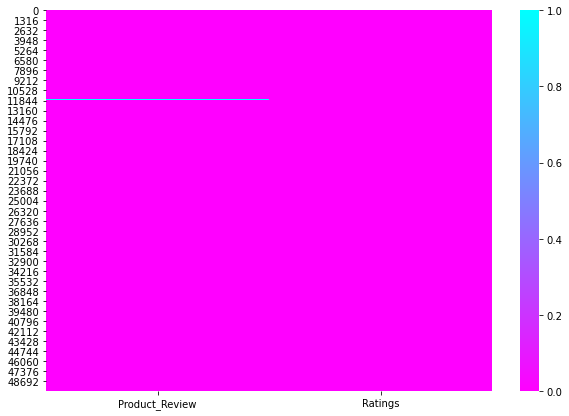

Product_Review    80
Ratings            0
dtype: int64

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(rating.isnull(),cmap="cool_r")
plt.show()
rating.isnull().sum()

In [18]:
rating['Product_Review'].fillna('Review Not Available',inplace=True)

In [19]:
rating.isnull().sum().any()

False

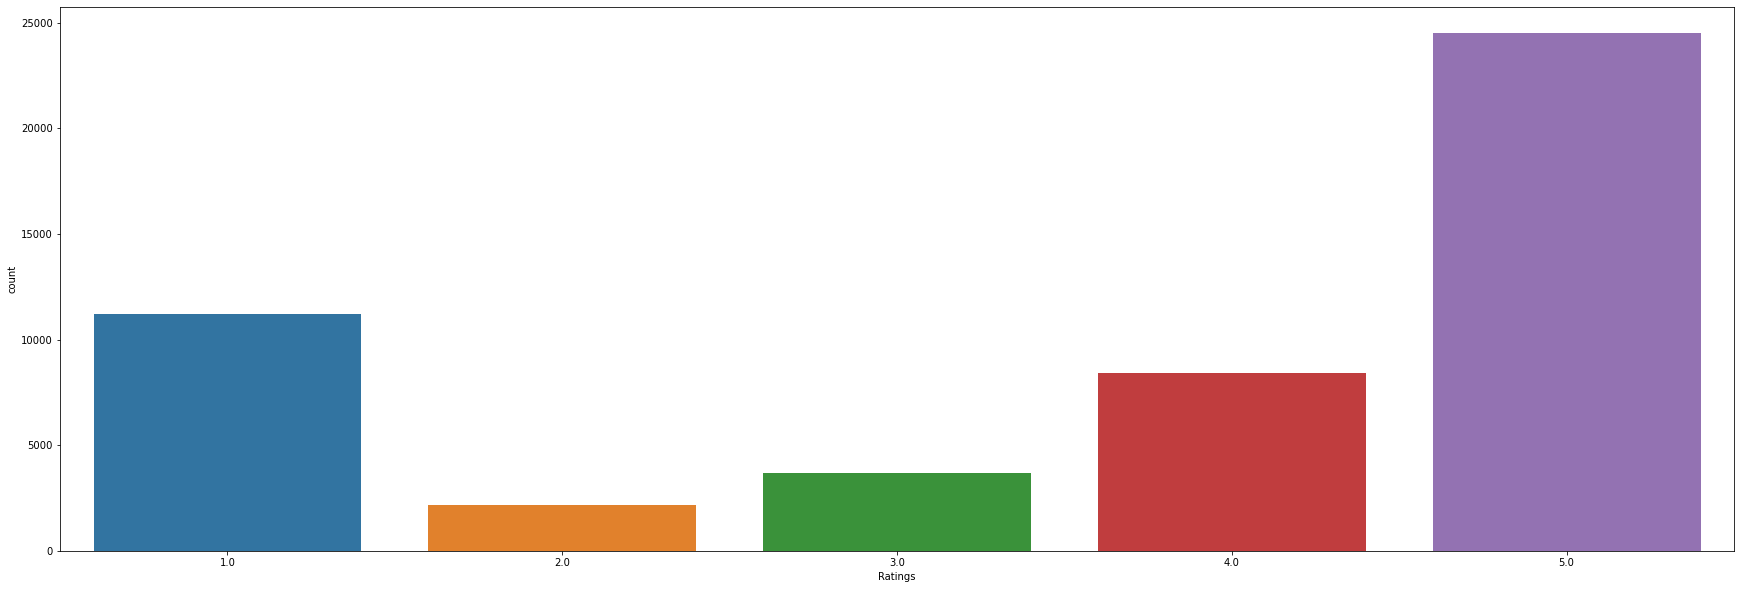

In [20]:
plt.figure(figsize=(30,10))
sns.countplot(rating['Ratings'])
plt.show()

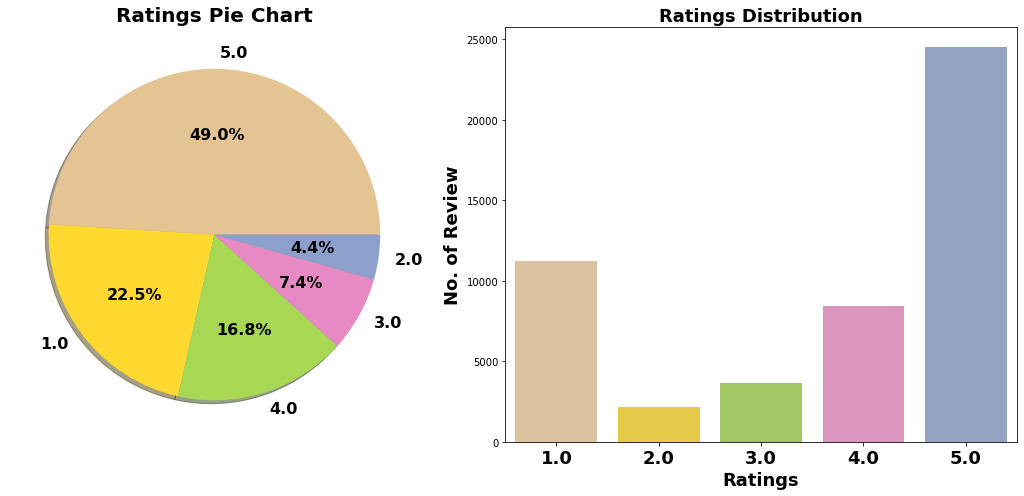

Value Counts of Rating:


5.0    24506
1.0    11232
4.0     8406
3.0     3680
2.0     2176
Name: Ratings, dtype: int64

In [21]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
f,ax=plt.subplots(1,2,figsize=(15,7))
rating['Ratings'].value_counts().plot.pie(autopct='%2.1f%%',
                                textprops ={'fontsize':16 ,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Ratings Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Ratings',data=rating,ax=ax[1])
ax[1].set_title('Ratings Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Ratings",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Review",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.tight_layout()
plt.show()
print('Value Counts of Rating:')
rating['Ratings'].value_counts()

In [22]:
print("Average rating given by users is " + str(rating['Ratings'].mean()))

Average rating given by users is 3.65556


In [23]:
import re 
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud

In [24]:
def clean_text(rating, rating_column_name):
    
    rating[rating_column_name] = rating[rating_column_name].str.lower()
    rating[rating_column_name] = rating[rating_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
    rating[rating_column_name] = rating[rating_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
    rating[rating_column_name] = rating[rating_column_name].str.replace(r'£|\$', 'dollars')
    rating[rating_column_name] = rating[rating_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
    rating[rating_column_name] = rating[rating_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')
    rating[rating_column_name] = rating[rating_column_name].str.replace(r'[^\w\d\s]', ' ')
    rating[rating_column_name] = rating[rating_column_name].str.replace(r'\s+', ' ')
    rating[rating_column_name] = rating[rating_column_name].str.replace(r'^\s+|\s+?$', '')
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    rating[rating_column_name] = rating[rating_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))


In [25]:
clean_text(rating, 'Product_Review')
rating['Product_Review'].tail(3)

49997    great product works really fine usually numbr ...
49998    service good would say keep good work goin fli...
49999    buy need bigger coverage buy repeater router c...
Name: Product_Review, dtype: object

In [26]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
rating['Product_Review'] = rating['Product_Review'].apply(lambda x: tokenizer.tokenize(x.lower()))
rating.head()

,Product_Review,Ratings
0,"[great, sound, quality, bass, numbr, months, u...",1.0
1,"[big, update, broke, along, right, hinge, wear...",2.0
2,"[premium, quality, product, boat, lifestyle, p...",5.0
3,"[boat, rockerz, line, boat, super, cheap, line...",1.0
4,"[super, comfortable, premium, looking, headpho...",5.0


In [28]:
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))


def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [29]:
processed_review = []

for doc in rating.Product_Review:
    processed_review.append(preprocess(doc))
    
print(len(processed_review))
processed_review[:3]

50000


[['great',
  'sound',
  'qualiti',
  'bass',
  'numbr',
  'month',
  'use',
  'get',
  'break',
  'without',
  'fall',
  'jerk',
  'wear',
  'normal',
  'get',
  'break',
  'one',
  'side',
  'call',
  'costum',
  'care',
  'servic',
  'repli',
  'come',
  'also',
  'file',
  'complaint',
  'boat',
  'offici',
  'websit',
  'warranti',
  'claim',
  'respond',
  'come',
  'servic',
  'center',
  'approach',
  'claim',
  'numbr',
  'wast'],
 ['big',
  'updat',
  'break',
  'along',
  'right',
  'hing',
  'wear',
  'normal',
  'split',
  'open',
  'one',
  'side',
  'extend',
  'weak',
  'pic',
  'inscud',
  'boat',
  'numbr',
  'break',
  'centr',
  'need',
  'concentr',
  'less',
  'celebr',
  'endors',
  'use',
  'profit',
  'materi',
  'qualiti',
  'control',
  'still',
  'work',
  'tap',
  'metal',
  'sheet',
  'still',
  'give',
  'numbr',
  'star',
  'sound',
  'origin',
  'review',
  'own',
  'boat',
  'product',
  'rockerz',
  'numbr',
  'earphon',
  'best',
  'experi',
  'produc

In [30]:
rating['clean_review']=processed_review  
rating.head()

,Product_Review,Ratings,clean_review
0,"[great, sound, quality, bass, numbr, months, u...",1.0,"[great, sound, qualiti, bass, numbr, month, us..."
1,"[big, update, broke, along, right, hinge, wear...",2.0,"[big, updat, break, along, right, hing, wear, ..."
2,"[premium, quality, product, boat, lifestyle, p...",5.0,"[premium, qualiti, product, boat, lifestyl, pr..."
3,"[boat, rockerz, line, boat, super, cheap, line...",1.0,"[boat, rockerz, line, boat, super, cheap, line..."
4,"[super, comfortable, premium, looking, headpho...",5.0,"[super, comfort, premium, look, headphon, beau..."


In [37]:
rating['Product_Review'] = rating['clean_review'].apply(lambda x:' '.join(y for y in x))
rating.head()

,Product_Review,Ratings,clean_review
0,great sound qualiti bass numbr month use get b...,1.0,"[great, sound, qualiti, bass, numbr, month, us..."
1,big updat break along right hing wear normal s...,2.0,"[big, updat, break, along, right, hing, wear, ..."
2,premium qualiti product boat lifestyl professi...,5.0,"[premium, qualiti, product, boat, lifestyl, pr..."
3,boat rockerz line boat super cheap lineup budg...,1.0,"[boat, rockerz, line, boat, super, cheap, line..."
4,super comfort premium look headphon beauti des...,5.0,"[super, comfort, premium, look, headphon, beau..."


In [42]:
tf = TfidfVectorizer()
features = tf.fit_transform(rating['Product_Review'])
X=features
Y=rating[['Ratings']]

In [43]:
X.shape

(50000, 5828)

In [44]:
Y.shape

(50000, 1)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=67, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (35000, 5828)
Training target vector size: (35000, 1)
Test feature matrix size: (15000, 5828)
Test target vector size: (15000, 1)


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(50,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.9071333333333333 on Random_state 71


In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=71, test_size=.3)

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=71, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.9071333333333333


Confusion matrix of Logistics Regression : 
 [[3330    7    3    9   29]
 [  35  573    0    2    7]
 [  42    0  820   13  232]
 [  36    3    5 1712  713]
 [ 121    5   16  115 7172]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

         1.0       0.93      0.99      0.96      3378
         2.0       0.97      0.93      0.95       617
         3.0       0.97      0.74      0.84      1107
         4.0       0.92      0.69      0.79      2469
         5.0       0.88      0.97      0.92      7429

    accuracy                           0.91     15000
   macro avg       0.94      0.86      0.89     15000
weighted avg       0.91      0.91      0.90     15000



In [50]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.5435 0.5184 0.6062 0.6375 0.5917]
Mean CV Score : 0.57946
Std deviation : 0.04302309147423043


In [51]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.8979333333333334


Confusion matrix of Decision Tree Classifier : 
 [[3338    7    3    9   21]
 [  35  573    0    2    7]
 [  39    1  826   37  204]
 [  35    8   26 1812  588]
 [ 123    6   97  283 6920]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

         1.0       0.94      0.99      0.96      3378
         2.0       0.96      0.93      0.95       617
         3.0       0.87      0.75      0.80      1107
         4.0       0.85      0.73      0.79      2469
         5.0       0.89      0.93      0.91      7429

    accuracy                           0.90     15000
   macro avg       0.90      0.87      0.88     15000
weighted avg       0.90      0.90      0.90     15000



In [52]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(dtc, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', dtc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.4427 0.4899 0.5864 0.5373 0.5875]
Mean CV Score : 0.52876
Std deviation : 0.05614643710868929


In [53]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier


Accuracy Score of Random Forest Classifier : 0.9136


Confusion matrix of Random Forest Classifier : 
 [[3334    7    3    9   25]
 [  35  573    0    2    7]
 [  36    0  821   12  238]
 [  23    3    7 1746  690]
 [  79    4   14  102 7230]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

         1.0       0.95      0.99      0.97      3378
         2.0       0.98      0.93      0.95       617
         3.0       0.97      0.74      0.84      1107
         4.0       0.93      0.71      0.80      2469
         5.0       0.88      0.97      0.93      7429

    accuracy                           0.91     15000
   macro avg       0.94      0.87      0.90     15000
weighted avg       0.92      0.91      0.91     15000



In [54]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(rfc, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', rfc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.5587 0.4886 0.5744 0.613  0.5822]
Mean CV Score : 0.5633800000000001
Std deviation : 0.041356324788356144


In [55]:
adbc=AdaBoostClassifier()
adbc.fit(X_train,Y_train)
y_pred=adbc.predict(X_test)
print('\033[1m'+'AdaBoost Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of AdaBoost Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of AdaBoost Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of AdaBoost Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

AdaBoost Classifier Evaluation


Accuracy Score of AdaBoost Classifier : 0.5932


Confusion matrix of AdaBoost Classifier : 
 [[1433    3   87   65 1790]
 [ 211  201    0   19  186]
 [  63    0  246   39  759]
 [ 133    3    7   41 2285]
 [ 299    5   62   86 6977]]


classification Report of AdaBoost Classifier 
               precision    recall  f1-score   support

         1.0       0.67      0.42      0.52      3378
         2.0       0.95      0.33      0.48       617
         3.0       0.61      0.22      0.33      1107
         4.0       0.16      0.02      0.03      2469
         5.0       0.58      0.94      0.72      7429

    accuracy                           0.59     15000
   macro avg       0.60      0.39      0.42     15000
weighted avg       0.55      0.59      0.52     15000



In [56]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(adbc, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score',adbc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score AdaBoostClassifier() :

CVScore : [0.4397 0.4939 0.5635 0.5533 0.5494]
Mean CV Score : 0.51996
Std deviation : 0.04689305279036545


In [57]:
grad_bc=GradientBoostingClassifier()
grad_bc.fit(X_train,Y_train)
y_pred=grad_bc.predict(X_test)
print('\033[1m'+'Gradient Boosting Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Gradient Boosting Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Gradient Boosting Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Gradient Boosting Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Gradient Boosting Classifier Evaluation


Accuracy Score of Gradient Boosting Classifier : 0.9022666666666667


Confusion matrix of Gradient Boosting Classifier : 
 [[3184    7    3    9  175]
 [  22  573    0    2   20]
 [  25    0  820    9  253]
 [  39    4    9 1700  717]
 [ 116    4   10   42 7257]]


classification Report of Gradient Boosting Classifier 
               precision    recall  f1-score   support

         1.0       0.94      0.94      0.94      3378
         2.0       0.97      0.93      0.95       617
         3.0       0.97      0.74      0.84      1107
         4.0       0.96      0.69      0.80      2469
         5.0       0.86      0.98      0.92      7429

    accuracy                           0.90     15000
   macro avg       0.94      0.86      0.89     15000
weighted avg       0.91      0.90      0.90     15000



In [58]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(grad_bc, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', grad_bc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score GradientBoostingClassifier() :

CVScore : [0.5675 0.5816 0.6613 0.6593 0.6081]
Mean CV Score : 0.61556
Std deviation : 0.038791834192262675


In [59]:
Final_mod = RandomForestClassifier(criterion='entropy',n_estimators= 150,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Final Random Forest Classifier Model'+'\033[0m')
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'Classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Final Random Forest Classifier Model
Accuracy Score :
 0.9133333333333333


Confusion matrix of Random Forest Classifier : 
 [[3338    7    3    9   21]
 [  35  573    0    2    7]
 [  35    0  821   12  239]
 [  28    3    7 1746  685]
 [  91    4   14   98 7222]]


Classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

         1.0       0.95      0.99      0.97      3378
         2.0       0.98      0.93      0.95       617
         3.0       0.97      0.74      0.84      1107
         4.0       0.94      0.71      0.81      2469
         5.0       0.88      0.97      0.93      7429

    accuracy                           0.91     15000
   macro avg       0.94      0.87      0.90     15000
weighted avg       0.92      0.91      0.91     15000

